In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook
import seaborn as sns

## Load data

In [3]:
train = pd.read_csv('water_potability.csv')
train.fillna('?', inplace=True)
train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,?,204.890455,20791.318981,7.300212,368.516,564.308654,10.379783,86.991,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,?,592.885359,15.180013,56.3291,4.500656,0
2,8.09912,224.236259,19909.541732,9.275884,?,418.606213,16.868637,66.4201,3.055934,0
3,8.31677,214.373394,22018.417441,8.059332,356.886,363.266516,18.436524,100.342,4.628771,0
4,9.09222,181.101509,17978.986339,6.546600,310.136,398.410813,11.558279,31.998,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.6681,193.681735,47580.991603,7.166639,359.949,526.424171,13.894419,66.6877,4.435821,1
3272,7.80886,193.553212,17329.802160,8.061362,?,392.449580,19.903225,?,2.798243,1
3273,9.41951,175.762646,33155.578218,7.350233,?,432.044783,11.039070,69.8454,3.298875,1
3274,5.12676,230.603758,11983.869376,6.303357,?,402.883113,11.168946,77.4882,4.708658,1


In [4]:
# use for numerical data, find the avarage for that feature
def find_average(df, key):
    total = 0
    count = 0
    for i in range(len(df[key])):
        if df[key][i] != '?':
            total += df[key][i]
            count += 1

    return total / count

In [5]:
replace = []
# get the value to replace ? for each feature
for key in train.keys():
    replace.append(find_average(train, key))


In [6]:
def impute_missing_data(df, replace):
    for index, key in enumerate(df.keys()):
        df[key].replace(to_replace="?", value=replace[index], inplace=True)

In [7]:
impute_missing_data(train, replace)
train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [8]:
# for i in range(9):
#     key = train.keys()[i]
#     ax = train[key].plot.hist(bins=100, figsize=(8,6), title=key)
#     fig = ax.get_figure()
#     fig.savefig(key)
#     fig.clear()


In [9]:
train


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


## Train data

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

n_neighbors:18
Accuracy:0.5980182926829268


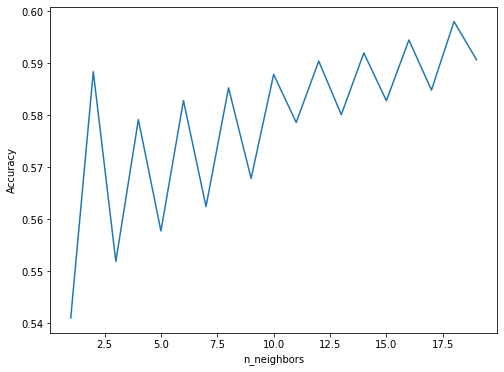

In [19]:
def train_data(n):
    X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = ['Potability']), train['Potability'], test_size=0.1)
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return metrics.accuracy_score(y_test, y_pred)
acc = 0
acc_list = []
high_accuracy = 0
n_neighbors = -1
for i in range(1,20):
    acc = 0
    for n in range(100):
        acc += train_data(i)
    acc = acc/100
    if (acc>high_accuracy):
        high_accuracy = acc
        n_neighbors = i 
    acc_list.append(acc)
plt.figure(figsize = (8,6))
plt.plot(range(1,20),acc_list)
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
print("n_neighbors:" + str(n_neighbors))
print("Accuracy:" + str(high_accuracy))

## Trying to optimize

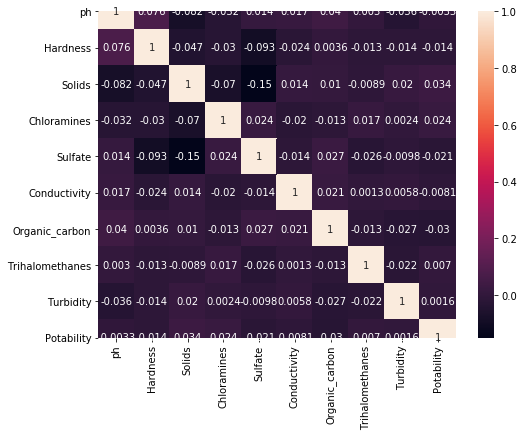

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(train.corr(), annot = True)
plt.show()

### Standardized Data to Optimize Result

n_neighbors:14
Accuracy:0.6448475609756096


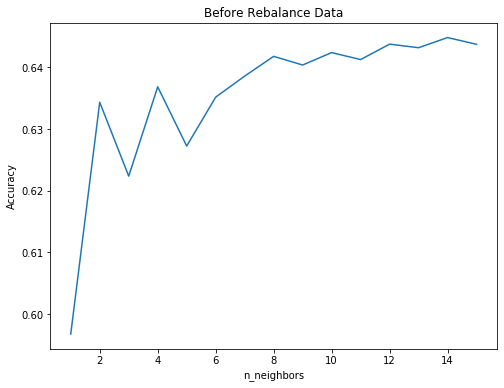

In [22]:
from sklearn import preprocessing
from sklearn.utils import resample,shuffle
def train_data_st(n):
    X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = ['Potability']), train['Potability'], test_size=0.1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n)
    knn.fit(X_scaled_train, y_train)
    y_pred = knn.predict(X_scaled_test)
    return metrics.accuracy_score(y_test, y_pred)
acc = 0
acc_list = []
high_accuracy = 0
n_neighbors = -1
for i in range(1,16):
    acc = 0
    for n in range(100):
        acc += train_data_st(i)
    acc = acc/100
    if (acc>high_accuracy):
        high_accuracy = acc
        n_neighbors = i 
    acc_list.append(acc)
plt.figure(figsize = (8,6))
plt.plot(range(1,16),acc_list)
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("Before Rebalance Data")
print("n_neighbors:" + str(n_neighbors))
print("Accuracy:" + str(high_accuracy))

<IPython.core.display.Javascript object>


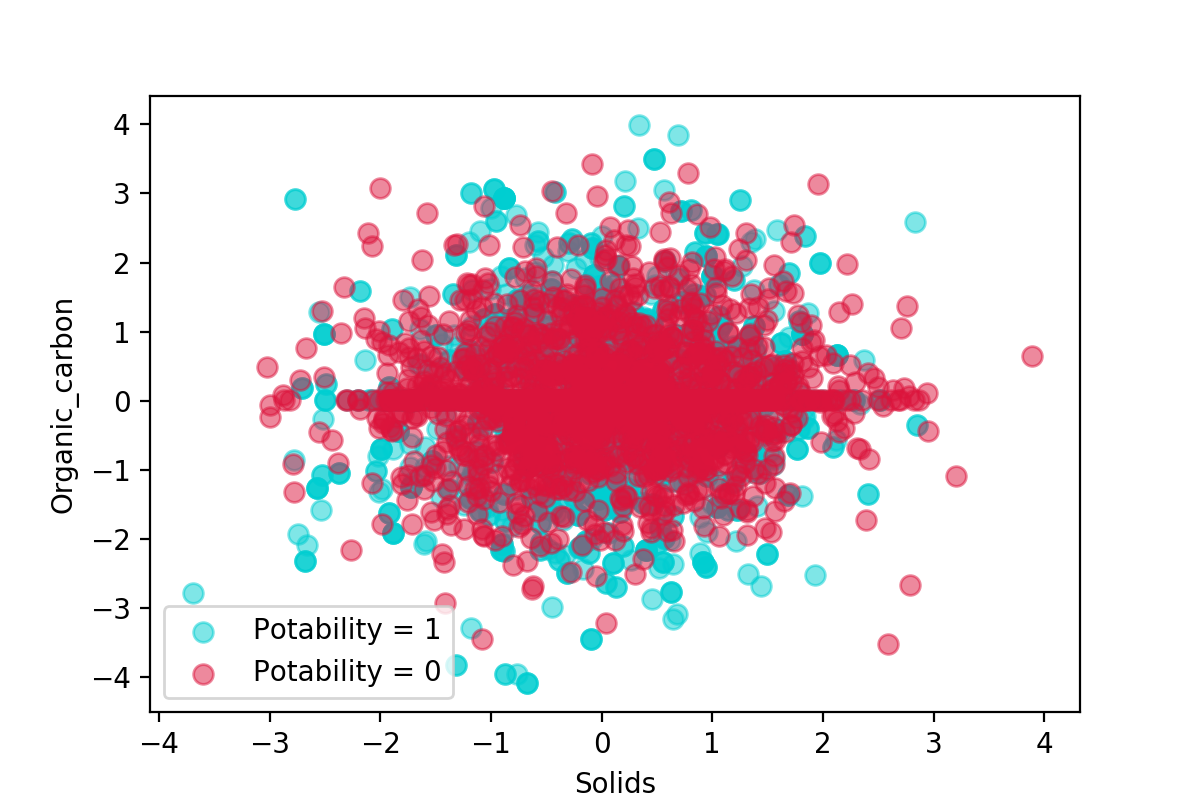

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.581881,0.384767,-1.141922,0.869853,0.008861,-1.233711,-0.316377,-2.101286,-2.940066,1
2,0.009537,-1.042089,0.519139,0.014076,-0.307364,-0.651514,-0.863655,-0.599401,1.499808,1
3,0.495105,1.121897,-0.608237,-0.648924,-0.268190,1.166808,1.072668,-0.397663,0.923818,1
4,-0.439435,-0.075620,-0.285602,0.296955,-0.501336,-0.564677,-0.423263,0.581364,-0.686208,1
5,-0.252564,1.033928,-1.421066,-0.760867,-2.982545,-0.243448,-0.444809,0.489501,-0.678171,1
...,...,...,...,...,...,...,...,...,...,...
3587,-0.235605,-0.245790,0.497758,0.806043,0.119439,0.781269,1.040611,0.663044,0.810069,1
3589,0.009537,1.388215,0.834538,-0.816872,0.186734,0.462811,-2.704993,-0.015258,-0.550628,1
3591,-0.312923,1.118961,-0.283358,-1.535385,2.682038,-0.293835,-0.768682,0.414107,0.611794,1
3594,-0.962878,-1.204391,-0.510508,-0.311637,1.532951,-1.245003,0.937618,0.048620,0.139845,1


In [199]:
df = pd.DataFrame(X_scaled_train)
df['Potability'] = y_train.values
df.columns = train.columns
df_slice1 = df[df['Potability'] == 1]
df_slice0 = df[df['Potability'] == 0]
colors1 = '#00CED1' 
colors2 = '#DC143C'
area = np.pi * 4**2


plt.figure(figsize = (6,4))
plt.scatter(df_slice1['Organic_carbon'],df_slice1['Sulfate'] , s=area, c=colors1, alpha=0.5, label='Potability = 1')
plt.scatter(df_slice0['Organic_carbon'],df_slice0['Sulfate'] , s=area, c=colors2, alpha=0.5, label='Potability = 0')
area = np.pi * 4**2
plt.legend()

plt.ylabel("Organic_carbon")
plt.xlabel("Solids")
plt.show()


df_slice1

### Rebalance data

<IPython.core.display.Javascript object>


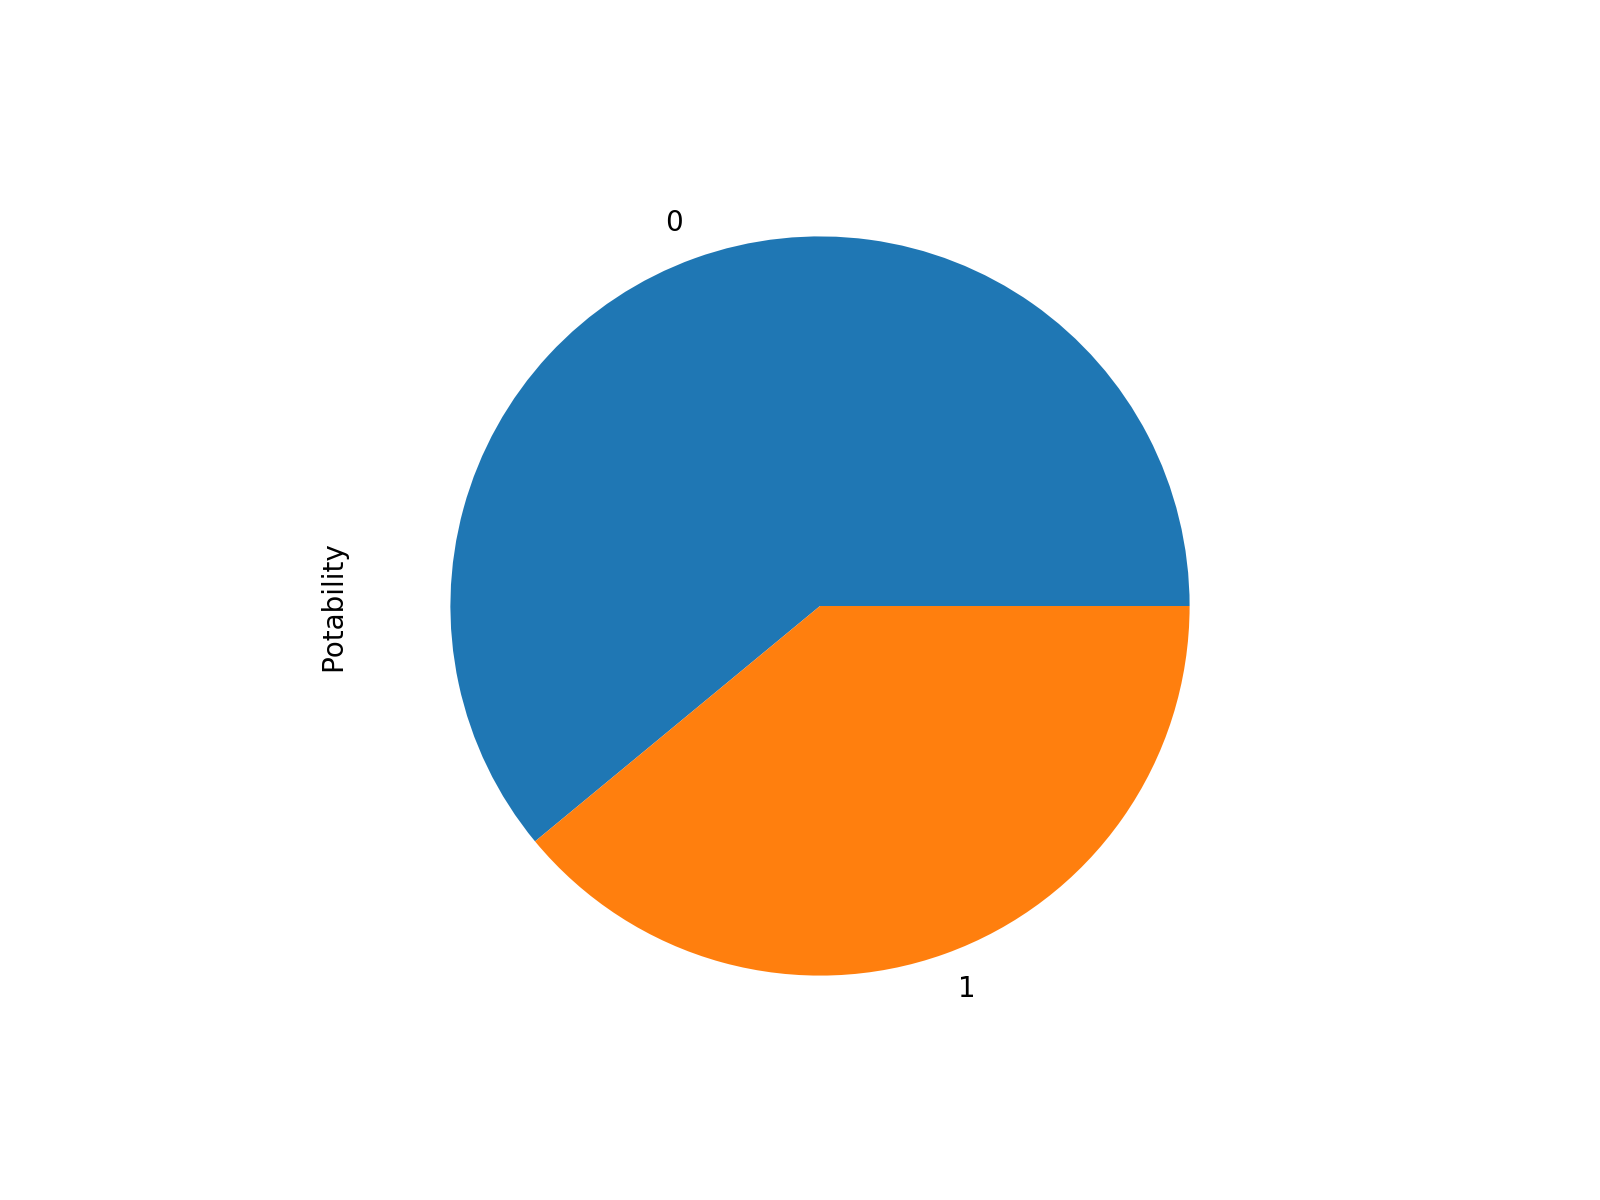

In [164]:
plt.figure(figsize = (8,6))
train['Potability'].value_counts().plot(kind = 'pie')

n_neighbors:1
Accuracy:0.7988250000000002


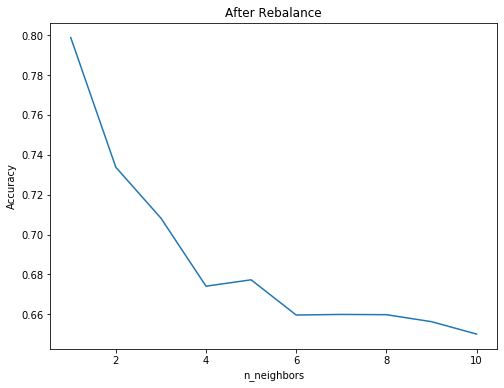

In [21]:


def train_data_final(knn_):
    df_1 = train[train['Potability'] == 1]#set other classes to another dataframe
    df_2 = train[train['Potability'] != 1]  #upsample the minority class
    df_1_upsampled = resample(df_1,random_state=42,n_samples=1998,replace=True)#concatenate the upsampled dataframe
    df_upsampled = pd.concat([df_1_upsampled,df_2])

    X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(columns = ['Potability']), df_upsampled['Potability'], test_size=0.1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=knn_)
    knn.fit(X_scaled_train, y_train)
    y_pred = knn.predict(X_scaled_test)
    return metrics.accuracy_score(y_test, y_pred)

acc_list = []
high_accuracy = 0
n_neighbors = -1
for i in range(1,11):
    acc = 0
    for n in range(100):
        acc += train_data_final(i)
    acc = acc/100
    if (acc>high_accuracy):
        high_accuracy = acc
        n_neighbors = i 
    acc_list.append(acc)
plt.figure(figsize = (8,6))
plt.plot(range(1,11),acc_list)
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("After Rebalance Data")
print("n_neighbors:" + str(n_neighbors))
print("Accuracy:" + str(high_accuracy))